Week 9: PDEs

The Earth’s ground temperature just below the surface can be treated as a diffusion problem with time-varying boundary conditions, as the mean surface temperature changes on a timescale of months.
Use dftcs.py as a starting point for a program to model the time-dependent temperature profile of the surface, i.e. T (z, t) where z is the depth.
 Run your simulation up to a depth of 20 m.

Natural time scale of a single step: 2.04e-02
Solution is expected to be stable.


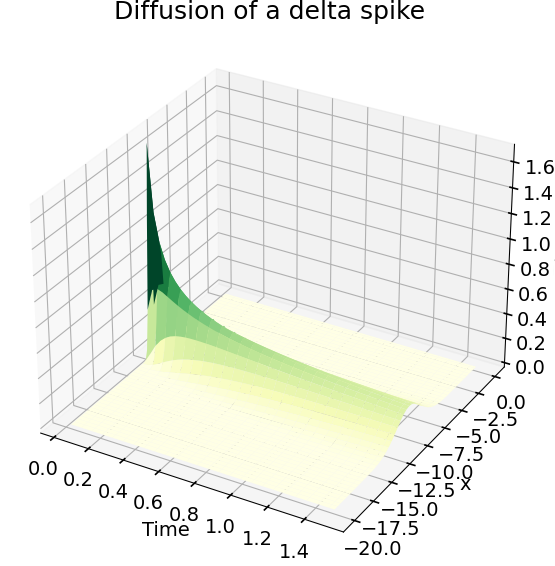

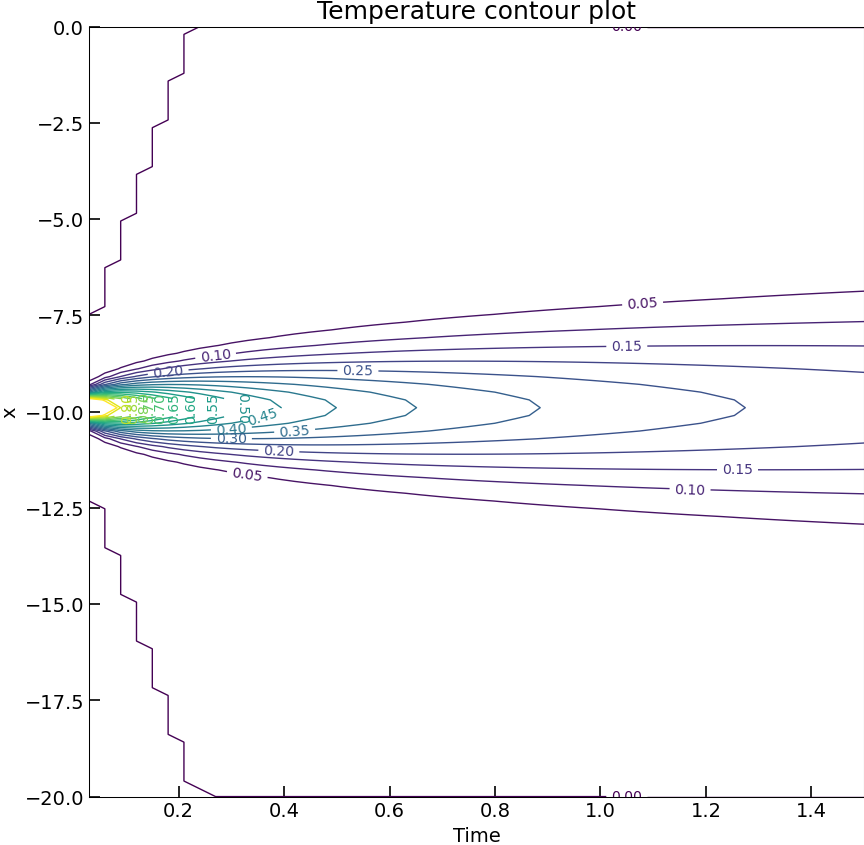

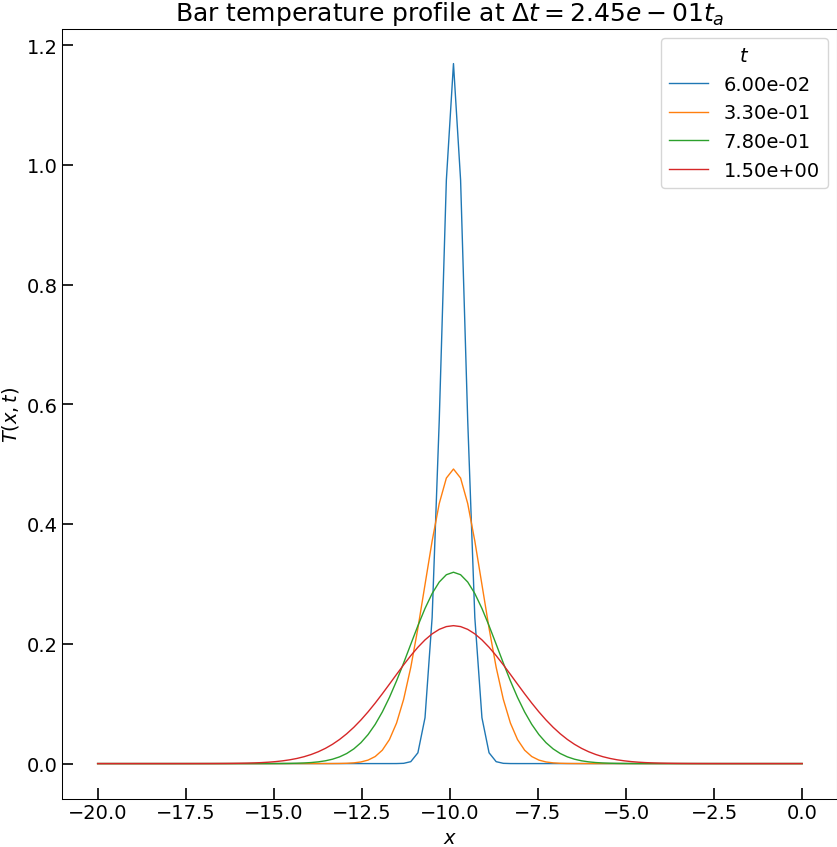

In [21]:
# dftcs - Program to solve the diffusion equation using Forward Time Centered Space (FTCS) scheme

# Set up configuration options and special features
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm



# Initialize parameters (time step, grid spacing, etc.)
tau = 0.005
N = 100
L = 20.0  # The system extends from x = -L to 0
h = L/(N-1)  # Grid size dx
kappa = 1.0  # Diffusion coefficient
coeff = kappa*tau/h**2
t_natural = h**2/(2*kappa)

print('Natural time scale of a single step: {0:.2e}'.format(h**2/(2*kappa)))

if coeff < 0.5:
    print('Solution is expected to be stable.')
else:
    print('Warning! Solution is expected to be unstable. Consider smaller dt or larger dx.')


# Set initial and boundary conditions.
tt = np.zeros(N)  # Initialize temperature to be zero at all points.
tt[int(N/2)] = 1.0/h  # Set initial condition: delta function of high temperature in the center
# The boundary conditions are tt[0] = tt[N-1] = 0

# Set up loop and plot variables.
xplot = np.arange(N)*h - L  # Record the x scale for plots
iplot = 0  # Counter used to count plots
nstep = 300  # Maximum number of iterations
nplots = 50  # Number of snapshots (plots) to take
plot_step = nstep/nplots  # Number of time steps between plots

# Loop over the desired number of time steps.
ttplot = np.empty((N, nplots))
tplot = np.empty(nplots)

## MAIN LOOP ##
for istep in range(nstep):
    # Compute new temperature using FTCS scheme. All points in space are updated at once.
    # Note that the endpoints (boundary) is not updated.
    tt[1:N-1] = tt[1:N-1] + coeff*(tt[2:N] + tt[0:N-2] - 2*tt[1:N-1])

    # Periodically record temperature for plotting.
    if (istep + 1) % plot_step < 1:  # record data for plot every plot_step number of steps. Don't record first step.
        ttplot[:, iplot] = np.copy(tt)  # record a copy of tt(i) for plotting
        tplot[iplot] = (istep+1)*tau  # record time for plots
        iplot += 1

# Plot temperature versus x and t as a wire-mesh plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
Tp, Xp = np.meshgrid(tplot, xplot)
ax.plot_surface(Tp, Xp, ttplot, rstride=2, cstride=2, cmap='YlGn')
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel(r'T(x,t)')
ax.set_title('Diffusion of a delta spike')

# Plot temperature versus x and t as a contour plot
fig2, ax2 = plt.subplots(figsize=(10,10))
levels = np.linspace(0.0, 1.0, num=21)
ct = ax2.contour(tplot, xplot, ttplot, levels)
ax2.clabel(ct, fmt='%1.2f')
ax2.set_xlabel('Time')
ax2.set_ylabel('x')
ax2.set_title('Temperature contour plot')

# Plot 1D slices of the temperature distribution vs. space at short and long times
fig3, ax3 =plt.subplots(figsize=(10,10))
ax3.set_title(r'Bar temperature profile at $\Delta t = {0:.2e}t_a$'.format(tau/t_natural))
ax3.plot(xplot, ttplot[:, 1], label='{0:.2e}'.format(tplot[1]))
ax3.plot(xplot, ttplot[:, 10], label='{0:.2e}'.format(tplot[10]))
ax3.plot(xplot, ttplot[:, 25], label='{0:.2e}'.format(tplot[25]))
ax3.plot(xplot, ttplot[:, -1], label='{0:.2e}'.format(tplot[-1]))
ax3.legend(title=r'$t$')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$T(x, t)$')

plt.show()


a) The thermal diffusion coefficient is κ = 0.1 m2 day−1. What is the expected diffusion timescale tD ?

In [22]:

L = 20.0  # The system extends from x = -L to 0
kappa = 0.1  # Diffusion coefficient
t_D = L**2/(2*kappa)
print(f'Diffusion timescale is approximately {t_D} days')

Diffusion timescale is approximately 2000.0 days


b) The initial conditions are T = 10◦ C everywhere except at the boundaries. The boundary conditions are T = 11◦ C at a depth of 20 m (owing to heat from the core) and T = 10◦ C at the surface. Implement these boundary conditions in your program.

Natural time scale of a single step: 5.05e-02
Solution is expected to be stable.


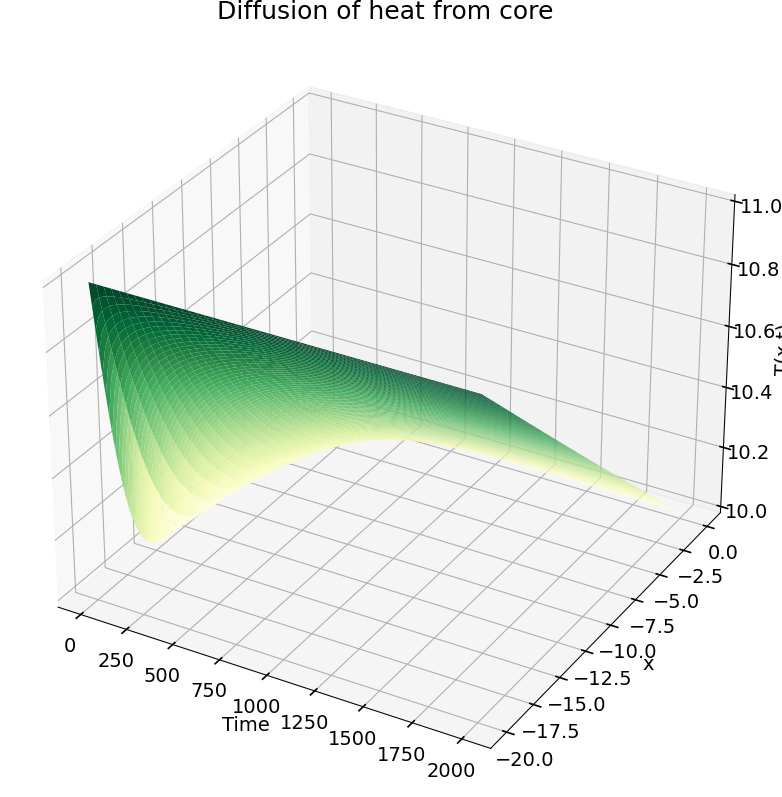

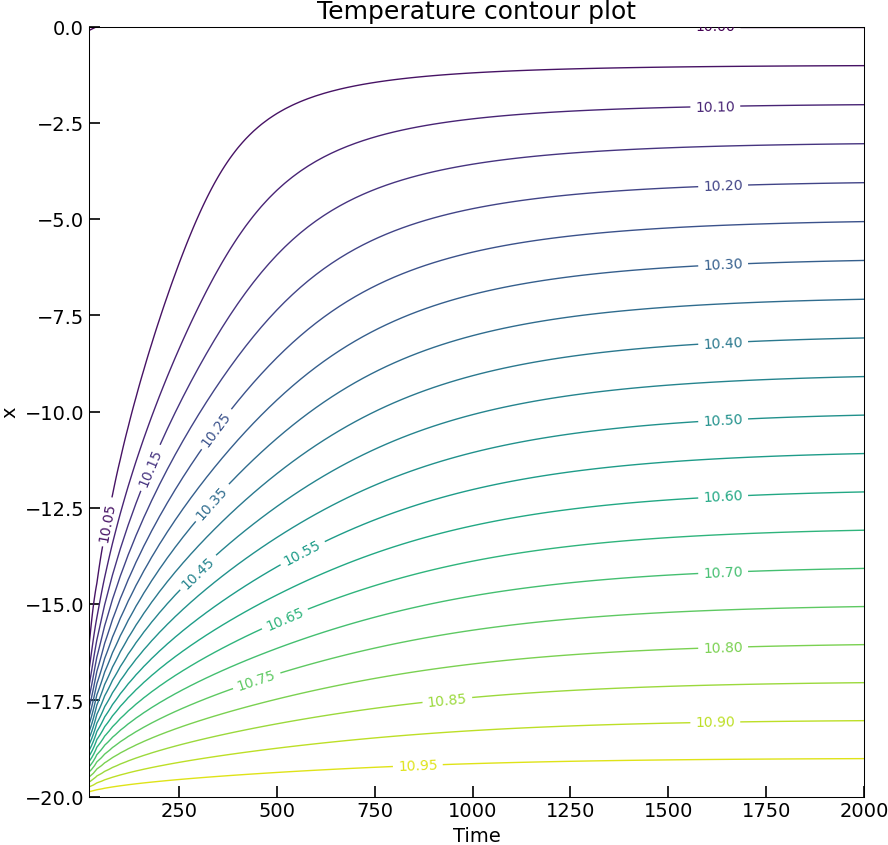

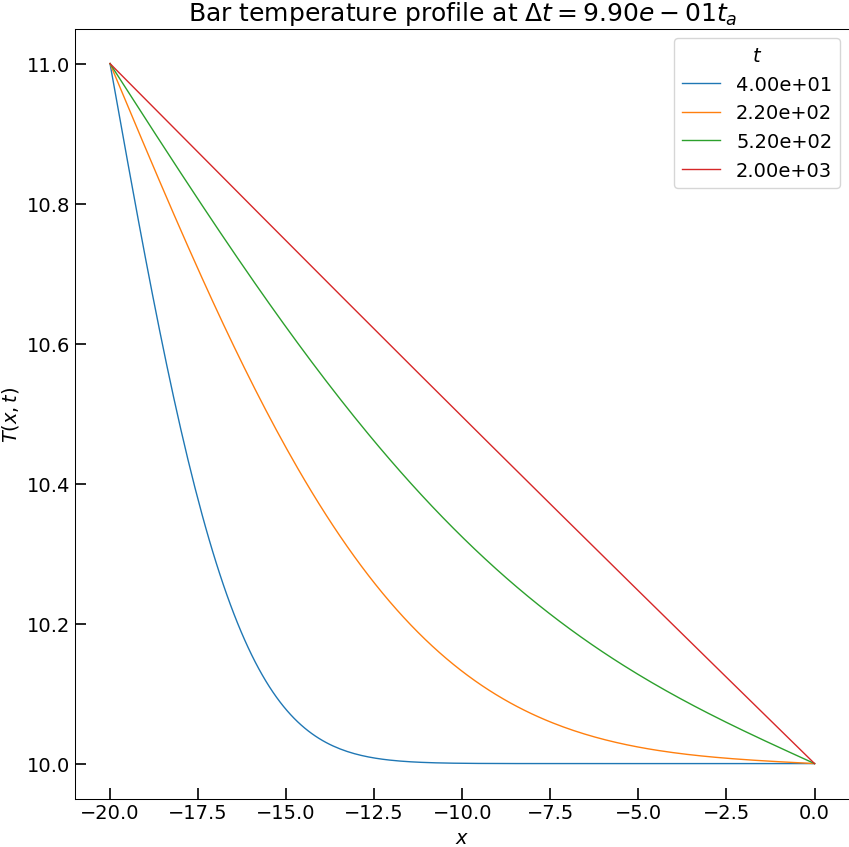

In [23]:
# dftcs - Program to solve the diffusion equation using Forward Time Centered Space (FTCS) scheme

# Set up configuration options and special features
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm



# Initialize parameters (time step, grid spacing, etc.)
tau = 0.05
N = 200
L = 20.0  # The system extends from x = -L to 0
h = L/(N-1)  # Grid size dx
kappa = 0.1  # Diffusion coefficient
coeff = kappa*tau/h**2
t_natural = h**2/(2*kappa)

print('Natural time scale of a single step: {0:.2e}'.format(h**2/(2*kappa)))

if coeff < 0.5:
    print('Solution is expected to be stable.')
else:
    print('Warning! Solution is expected to be unstable. Consider smaller dt or larger dx.')


# Set initial and boundary conditions.
tt = 10*np.ones(N)  # Initialize temperature to be 10 at all points.
tt[0]=11  # Set initial condition: 11 degrees at depths, 10 degrees at surface
tt[N-1] = 10


# Set up loop and plot variables.
xplot = np.arange(N)*h - L  # Record the x scale for plots
iplot = 0  # Counter used to count plots
nstep = int(np.ceil(t_D/tau))  # Maximum number of iterations
nplots = 100  # Number of snapshots (plots) to take
plot_step = nstep/nplots  # Number of time steps between plots

# Loop over the desired number of time steps.
ttplot = np.empty((N, nplots))
tplot = np.empty(nplots)

## MAIN LOOP ##
for istep in range(nstep):
    # Compute new temperature using FTCS scheme. All points in space are updated at once.
    # Note that the endpoints (boundary) is not updated.
    tt[1:N-1] = tt[1:N-1] + coeff*(tt[2:N] + tt[0:N-2] - 2*tt[1:N-1])

    # Periodically record temperature for plotting.
    if (istep + 1) % plot_step < 1:  # record data for plot every plot_step number of steps. Don't record first step.
        ttplot[:, iplot] = np.copy(tt)  # record a copy of tt(i) for plotting
        tplot[iplot] = (istep+1)*tau  # record time for plots
        iplot += 1

# Plot temperature versus x and t as a wire-mesh plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
Tp, Xp = np.meshgrid(tplot, xplot)
ax.plot_surface(Tp, Xp, ttplot, rstride=2, cstride=2, cmap='YlGn')
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel(r'T(x,t)')
ax.set_title('Diffusion of heat from core')

# Plot temperature versus x and t as a contour plot
fig2, ax2 = plt.subplots(figsize=(10,10))
levels = np.linspace(10.0, 11.0, num=21)
ct = ax2.contour(tplot, xplot, ttplot, levels)
ax2.clabel(ct, fmt='%1.2f')
ax2.set_xlabel('Time')
ax2.set_ylabel('x')
ax2.set_title('Temperature contour plot')

# Plot 1D slices of the temperature distribution vs. space at short and long times
fig3, ax3 =plt.subplots(figsize=(10,10))
ax3.set_title(r'Bar temperature profile at $\Delta t = {0:.2e}t_a$'.format(tau/t_natural))
ax3.plot(xplot, ttplot[:, 1], label='{0:.2e}'.format(tplot[1]))
ax3.plot(xplot, ttplot[:, 10], label='{0:.2e}'.format(tplot[10]))
ax3.plot(xplot, ttplot[:, 25], label='{0:.2e}'.format(tplot[25]))
ax3.plot(xplot, ttplot[:, -1], label='{0:.2e}'.format(tplot[-1]))
ax3.legend(title=r'$t$')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$T(x, t)$')

plt.show()


c) Choose reasonable values for the space and time intervals and the number of spatial grid points.
Justify your choices in your write-up.
Run the system forward in time and discuss the results.
Confirm that the final temperature profile is as one would expect after a time tD.

In [24]:
tau = 0.05
N = 200
L = 20.0  # The system extends from x = -L to 0
h = L/(N-1)
kappa = 0.1  # Diffusion coefficient
coeff = kappa*tau/h**2
print(f'stability coefficient ={coeff} is less than 0.5, so solution should be stable')

stability coefficient =0.4950125 is less than 0.5, so solution should be stable


I chose 200 spatial grid points as that seemed definitely fine enough to capture the temperature curve with fine detail. I then chose tau =0.05 and automatically chose h ~= 0.1 as they seem reasonable values as they are just fine enough to keep the stability coefficient below 0.5, making the scheme stable.

The temperature profiles over time look as one would expect: a step that gradually reaches the equilibrium of a line between the two boundary temperatures.

# Challenge question:
Now, change the surface temperature boundary condition to be the following function of time:

$$T(t) = A + B\,sin \bigl( \frac{2\pi t}{\tau} \bigr) $$
where A = 10 C, B = 12 C, and $\tau$ = 365 days.
Run the system long enough for it to settle down into a stable pattern, then plot T (z) for each for the 4 seasons.

Natural time scale of a single step: 5.05e-02
Solution is expected to be stable.


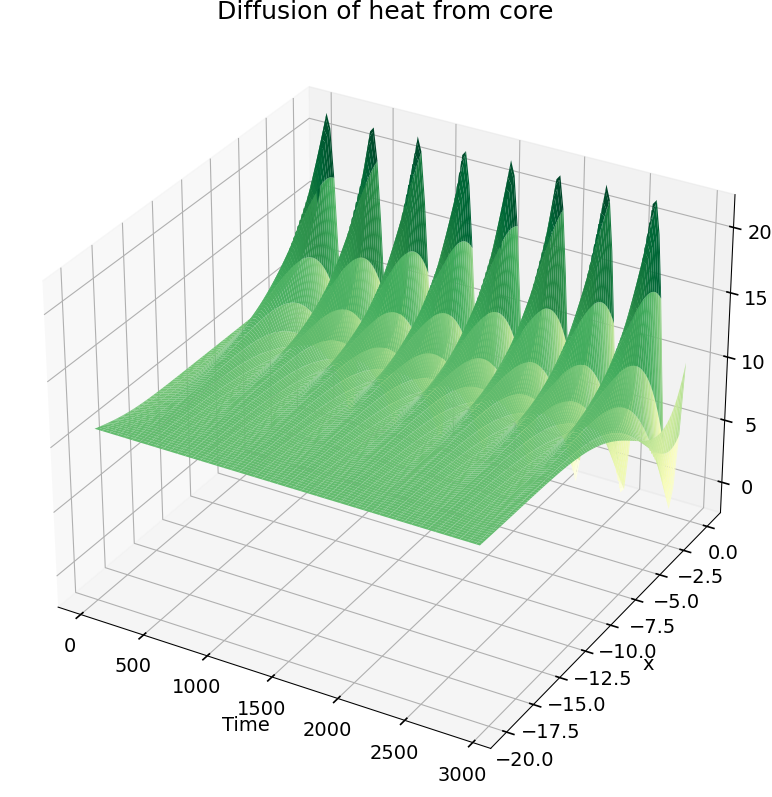

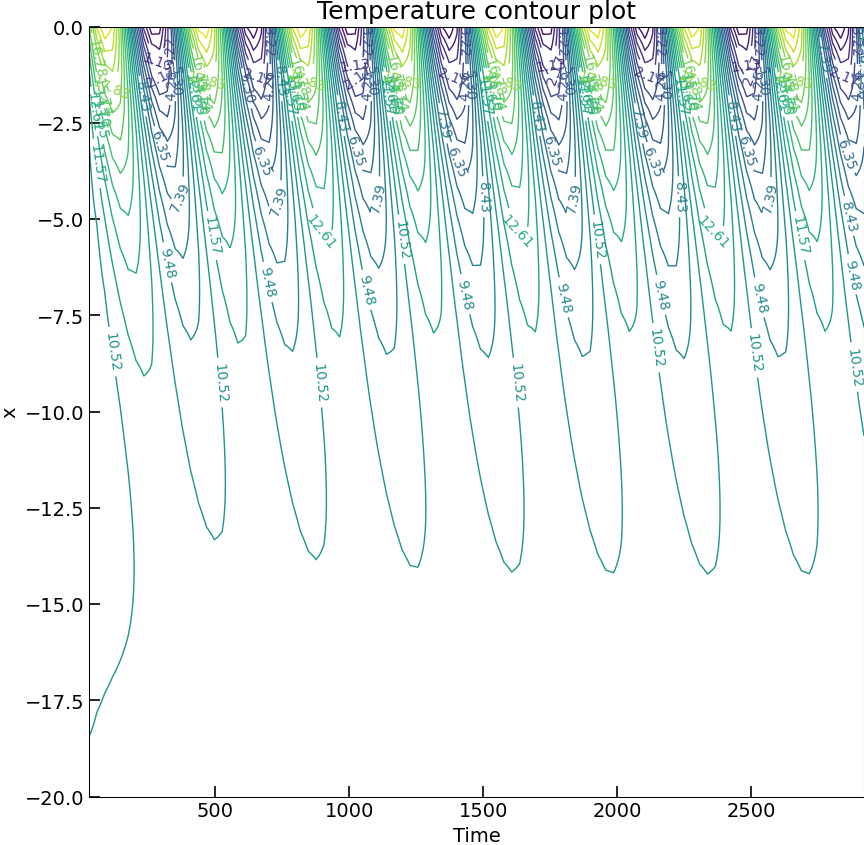

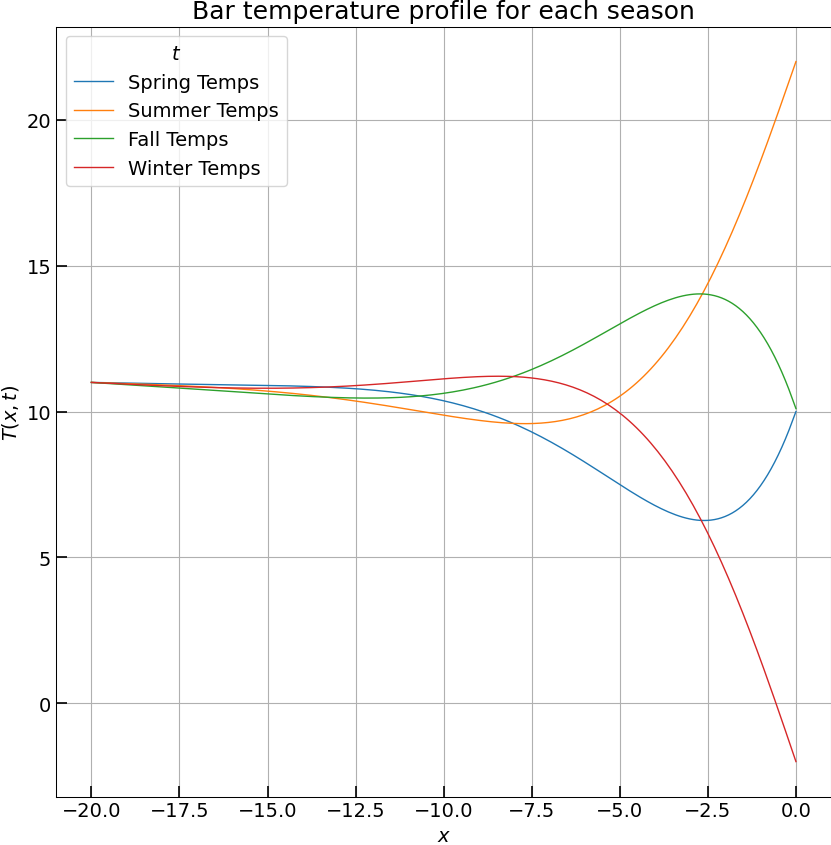

In [25]:
# dftcs - Program to solve the diffusion equation using Forward Time Centered Space (FTCS) scheme

# Set up configuration options and special features
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm



# Initialize parameters (time step, grid spacing, etc.)
tau = 0.05
N = 200
L = 20.0  # The system extends from x = -L to 0
h = L/(N-1)  # Grid size dx
kappa = 0.1  # Diffusion coefficient
coeff = kappa*tau/h**2
t_natural = h**2/(2*kappa)

print('Natural time scale of a single step: {0:.2e}'.format(h**2/(2*kappa)))

if coeff < 0.5:
    print('Solution is expected to be stable.')
else:
    print('Warning! Solution is expected to be unstable. Consider smaller dt or larger dx.')


# Set initial and boundary conditions.
tt = 10*np.ones(N)  # Initialize temperature to be 10 at all points.
tt[0]=11  # Set initial condition: 11 degrees at depths, 10 degrees at surface
tt[N-1] = 10


# Set up loop and plot variables.
xplot = np.arange(N)*h - L  # Record the x scale for plots
iplot = 0  # Counter used to count plots

tMax=np.ceil(t_D/365)*365+365*2# Max day limit set to diffusion timescale
# rounded up to a set number of years, plus two more years

#set the times to record the seasons
tFinalYearStart=tMax-365
tPlotSpring=tFinalYearStart
tPlotSummer=tFinalYearStart+np.round(365*(1/4))
tPlotFall=tFinalYearStart+np.round(365*(2/4))
tPlotWinter=tFinalYearStart+np.round(365*(3/4))

springStep=np.ceil(tPlotSpring/tau)
summerStep=np.ceil(tPlotSummer/tau)
fallStep=np.ceil(tPlotFall/tau)
winterStep=np.ceil(tPlotWinter/tau)




nstep = int(np.ceil((tMax/tau)))  # Maximum number of iterations
nplots = 100  # Number of snapshots (plots) to take
plot_step = nstep/nplots  # Number of time steps between plots

# Loop over the desired number of time steps.
ttplot = np.empty((N, nplots))
tplot = np.empty(nplots)

## MAIN LOOP ##
for istep in range(nstep):
    timeNow=(istep+1)*tau
    tt[N-1]=10+12*np.sin(2*np.pi*timeNow/365)
    # Compute new temperature using FTCS scheme. All points in space are updated at once.
    # Note that the endpoints (boundary) is not updated.
    tt[1:N-1] = tt[1:N-1] + coeff*(tt[2:N] + tt[0:N-2] - 2*tt[1:N-1])

    # Periodically record temperature for plotting.
    if (istep + 1) % plot_step < 1:  # record data for plot every plot_step number of steps. Don't record first step.
        ttplot[:, iplot] = np.copy(tt)  # record a copy of tt(i) for plotting
        tplot[iplot] = (istep+1)*tau  # record time for plots
        iplot += 1
    #record final season temperatures
    if timeNow > 0.8 *tFinalYearStart:
        #if time is past just before the final year, start checking if it's time to record each season
        if istep+1 == springStep:
            springTemp=np.copy(tt)
        if istep+1 == summerStep:
            summerTemp=np.copy(tt)
        if istep+1 == fallStep:
            fallTemp=np.copy(tt)
        if istep+1 == winterStep:
            winterTemp=np.copy(tt)

# Plot temperature versus x and t as a wire-mesh plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
Tp, Xp = np.meshgrid(tplot, xplot)
ax.plot_surface(Tp, Xp, ttplot, rstride=2, cstride=2, cmap='YlGn')
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel(r'T(x,t)')
ax.set_title('Diffusion of heat from core')

# Plot temperature versus x and t as a contour plot
fig2, ax2 = plt.subplots(figsize=(10,10))
levels = np.linspace(-2, 22.0, num=24)
ct = ax2.contour(tplot, xplot, ttplot, levels)
ax2.clabel(ct, fmt='%1.2f')
ax2.set_xlabel('Time')
ax2.set_ylabel('x')
ax2.set_title('Temperature contour plot')

# Plot 1D slices of the temperature distribution vs. space at short and long times
fig3, ax3 =plt.subplots(figsize=(10,10))
ax3.set_title(r'Bar temperature profile for each season')
ax3.plot(xplot, springTemp, label='Spring Temps')
ax3.plot(xplot, summerTemp, label='Summer Temps')
ax3.plot(xplot, fallTemp, label='Fall Temps')
ax3.plot(xplot, winterTemp, label='Winter Temps')

ax3.legend(title=r'$t$')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$T(x, t)$')
ax3.grid()
plt.show()


Seasons look as one would expect, a lump of heat or cold underground based on the previous conditions, and a more current atmosphere-like temperature approaching the surface. Memory of the previous season is clear. For example, spring has a lump of cold just underground because even as the surface is warming coming into spring, the ground has been cooled during winter, so that temperature lingers. As one gets deeper, the temperature of the surface becomes less important and the core temperature the driving factor.